### Importing Libraries and Loading Dataset

In [111]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from xgboost import XGBRegressor




In [98]:
df = pd.read_csv('data/Medical-Insurance.csv')
df

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000
...,...,...,...,...,...,...,...,...,...,...,...
981,18,0,0,0,0,169,67,0,0,0,15000
982,64,1,1,0,0,153,70,0,0,3,28000
983,56,0,1,0,0,155,71,0,0,1,29000
984,47,1,1,0,0,158,73,1,0,1,39000


In [99]:
df.describe()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,41.745436,0.419878,0.468560,0.055781,0.180527,168.182556,76.950304,0.215010,0.117647,0.667343,24336.713996
std,13.963371,0.493789,0.499264,0.229615,0.384821,10.098155,14.265096,0.411038,0.322353,0.749205,6248.184382
min,18.000000,0.000000,0.000000,0.000000,0.000000,145.000000,51.000000,0.000000,0.000000,0.000000,15000.000000
25%,30.000000,0.000000,0.000000,0.000000,0.000000,161.000000,67.000000,0.000000,0.000000,0.000000,21000.000000
50%,42.000000,0.000000,0.000000,0.000000,0.000000,168.000000,75.000000,0.000000,0.000000,1.000000,23000.000000
75%,53.000000,1.000000,1.000000,0.000000,0.000000,176.000000,87.000000,0.000000,0.000000,1.000000,28000.000000
max,66.000000,1.000000,1.000000,1.000000,1.000000,188.000000,132.000000,1.000000,1.000000,3.000000,40000.000000


Here, we can see that:
- There are no null values in any of the features
- The numerical features Age, Height and Weight have different scales, so I will standardize these 3 features later on
- Premium Price has a high standard deviation which means some individuals may have much higher or lower premiums than the mean premium, indicating a diverse range of pricing

### EDA

In [12]:
df.corr()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
Age,1.000000,0.210908,0.244888,-0.008549,0.051072,0.039879,-0.018590,-0.024416,-0.027623,0.429181,0.697540
Diabetes,0.210908,1.000000,0.127727,-0.036652,-0.089428,-0.003783,-0.024563,-0.080102,-0.055527,0.122722,0.076209
BloodPressureProblems,0.244888,0.127727,1.000000,-0.024538,0.045424,-0.037926,-0.061016,-0.011550,0.048239,0.251568,0.167097
AnyTransplants,-0.008549,-0.036652,-0.024538,1.000000,0.035285,-0.031543,0.002087,0.001876,-0.020171,-0.004154,0.289056
AnyChronicDiseases,0.051072,-0.089428,0.045424,0.035285,1.000000,0.047419,-0.033318,-0.027418,0.008666,0.014835,0.208610
Height,0.039879,-0.003783,-0.037926,-0.031543,0.047419,1.000000,0.066946,-0.010200,0.010549,0.037289,0.026910
Weight,-0.018590,-0.024563,-0.061016,0.002087,-0.033318,0.066946,1.000000,0.037492,0.003481,-0.006108,0.141507
KnownAllergies,-0.024416,-0.080102,-0.011550,0.001876,-0.027418,-0.010200,0.037492,1.000000,0.115383,0.103923,0.012103
HistoryOfCancerInFamily,-0.027623,-0.055527,0.048239,-0.020171,0.008666,0.010549,0.003481,0.115383,1.000000,0.212657,0.083139
NumberOfMajorSurgeries,0.429181,0.122722,0.251568,-0.004154,0.014835,0.037289,-0.006108,0.103923,0.212657,1.000000,0.264250


We see that:
- Age and Premium Price are highly correlated which says as age increases Premium prices also increase
- Also, AnyTransplants, AnyChronicDiseases and NumberofMajorSurgeries show positive correlation with premium price

<Axes: xlabel='PremiumPrice', ylabel='Count'>

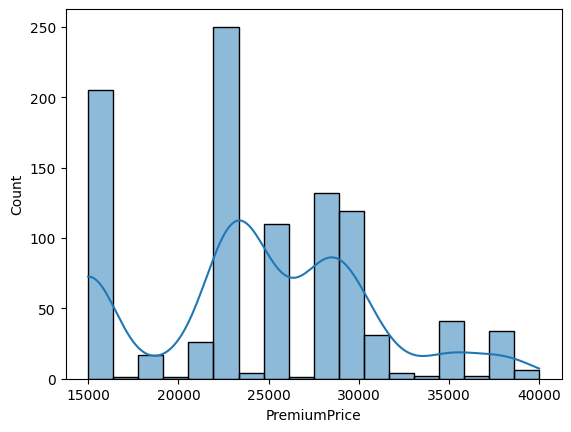

In [17]:
sns.histplot(df['PremiumPrice'], kde = True)

Here we see that the number of users that had a premium of more than 32500 is very less compared to others

<Axes: xlabel='Height', ylabel='Count'>

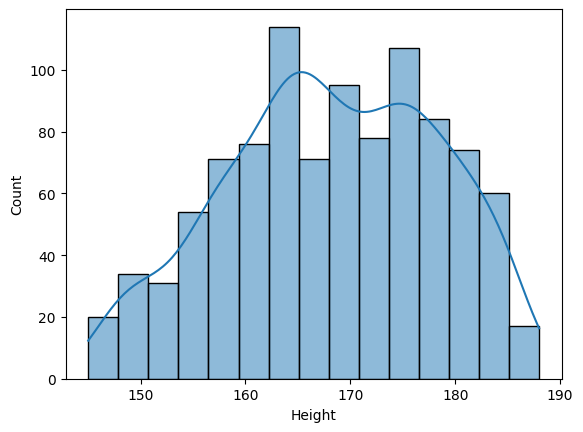

In [21]:
sns.histplot(df['Height'], kde = True)

<Axes: xlabel='Weight', ylabel='Count'>

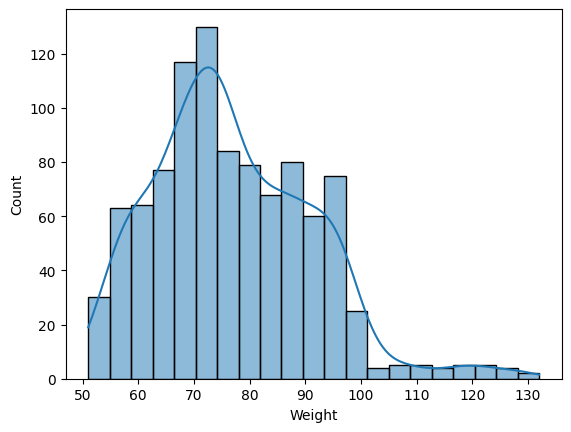

In [24]:
sns.histplot(df['Weight'], kde = True)

Here we see that the weight feature is right skewed, it will be better if during the model building process we used tree based models and SVM, so that it can handle the skeweness well rather than doing transformations right now. 

<Axes: ylabel='PremiumPrice'>

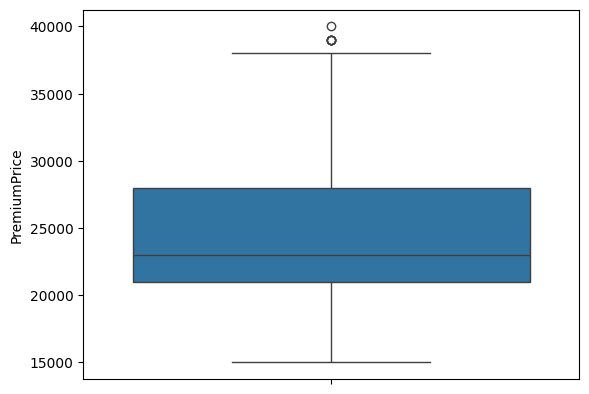

In [25]:
sns.boxplot(df['PremiumPrice'])

<Axes: ylabel='Height'>

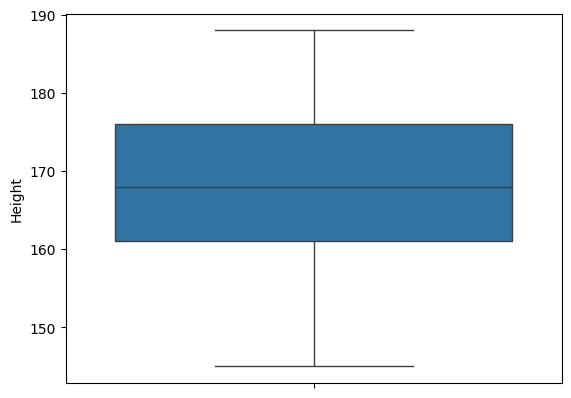

In [26]:
sns.boxplot(df['Height'])

<Axes: ylabel='Weight'>

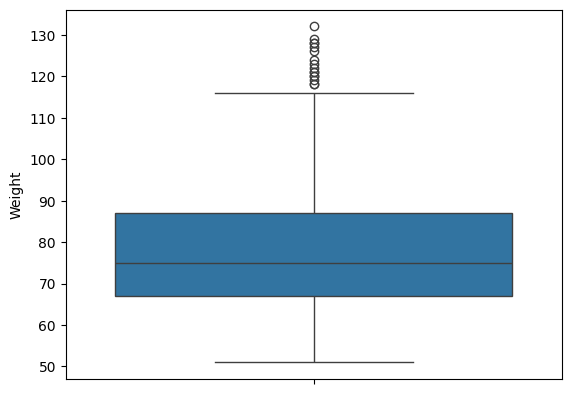

In [27]:
sns.boxplot(df['Weight'])

In [28]:
df[df['Weight'] > 110]

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
151,47,0,0,0,0,169,116,0,0,1,35000
154,21,0,0,0,0,157,118,1,0,1,15000
158,43,0,0,0,0,158,121,0,0,0,23000
160,58,1,1,0,0,180,116,0,0,1,35000
175,55,0,0,0,0,162,116,0,0,1,35000
183,36,0,0,0,0,156,119,0,0,0,23000
186,19,0,0,0,0,173,129,1,0,0,15000
192,50,1,0,0,0,163,127,0,0,2,28000
195,19,0,0,0,0,164,132,0,0,0,15000
196,39,0,1,0,0,174,120,0,0,0,23000


Here we can see that all these records which are outliers for weight, have very high values or weight. I am not sure if this is due to data entry or not, but it is possible for people to have different weights. Since, the number of outliers is very small compared to the number of records in the dataset, I will not remove these outliers as they contain different important information like 'NumberOfMajorSurgeries'. Also, I will have to make sure to use Ensemble Models so that they are robust to outliers. 

### Data Preprocessing

In [113]:
#Separing Target feature

target = df['PremiumPrice']

features_df = df.iloc[:, :-1]

In [101]:
features_df

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries
0,45,0,0,0,0,155,57,0,0,0
1,60,1,0,0,0,180,73,0,0,0
2,36,1,1,0,0,158,59,0,0,1
3,52,1,1,0,1,183,93,0,0,2
4,38,0,0,0,1,166,88,0,0,1
...,...,...,...,...,...,...,...,...,...,...
981,18,0,0,0,0,169,67,0,0,0
982,64,1,1,0,0,153,70,0,0,3
983,56,0,1,0,0,155,71,0,0,1
984,47,1,1,0,0,158,73,1,0,1


In [35]:
target

0      25000
1      29000
2      23000
3      28000
4      23000
       ...  
981    15000
982    28000
983    29000
984    39000
985    15000
Name: PremiumPrice, Length: 986, dtype: int64

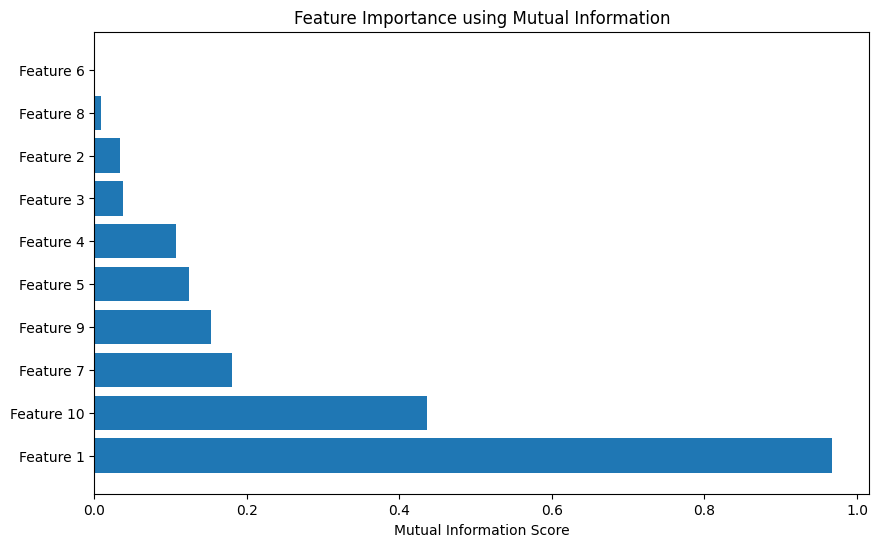

In [105]:
mi_scores = mutual_info_regression(features_df, target)

# Get feature names (replace with your actual feature names)
feature_names = np.array([f"Feature {i}" for i in range(1, features_df.shape[1] + 1)])

# Create a DataFrame to visualize feature importance
feature_df = pd.DataFrame({'Feature': feature_names, 'MI Score': mi_scores})

# Sort features based on their MI scores
feature_df = feature_df.sort_values(by='MI Score', ascending=False)

# Plot the features in order of importance
plt.figure(figsize=(10, 6))
plt.barh(feature_df['Feature'], feature_df['MI Score'])
plt.xlabel('Mutual Information Score')
plt.title('Feature Importance using Mutual Information')
plt.show()

Here we can see that the features "Height" has zero importantance in accordance with the target variable, so we will drop these two features

In [114]:
features_df.drop(['Height', 'Diabetes', 'BloodPressureProblems', 'KnownAllergies'], axis = 1, inplace = True)

/var/folders/yf/rqy3ypks5s3fxtcc2nff9knr0000gn/T/ipykernel_15296/3606139704.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_df.drop(['Height', 'Diabetes', 'BloodPressureProblems', 'KnownAllergies'], axis = 1, inplace = True)


In [115]:
features_df

,Age,AnyTransplants,AnyChronicDiseases,Weight,HistoryOfCancerInFamily,NumberOfMajorSurgeries
0,45,0,0,57,0,0
1,60,0,0,73,0,0
2,36,0,0,59,0,1
3,52,0,1,93,0,2
4,38,0,1,88,0,1
...,...,...,...,...,...,...
981,18,0,0,67,0,0
982,64,0,0,70,0,3
983,56,0,0,71,0,1
984,47,0,0,73,0,1


In [116]:
#Splitting dataset into training and testing

X_train, X_test, y_train, y_test = train_test_split(features_df, target, 
                                                    test_size=0.2, random_state=100)

In [117]:
#Standardization of numerical features

features = ['Age', 'Weight']
sc = StandardScaler()
X_train[features] = sc.fit_transform(X_train[features])
X_test[features] = sc.transform(X_test[features])

In [118]:
X_train

,Age,AnyTransplants,AnyChronicDiseases,Weight,HistoryOfCancerInFamily,NumberOfMajorSurgeries
501,-1.113934,0,1,-0.285869,0,1
637,-0.039101,0,1,-0.714809,0,0
424,1.394008,0,0,-1.501198,1,2
10,1.322353,0,0,-0.214379,0,2
454,-0.684001,0,0,-0.643319,0,1
...,...,...,...,...,...,...
855,-0.898967,0,0,-0.214379,0,0
871,-0.970623,0,0,-0.643319,0,1
835,-1.472211,0,0,0.786480,0,0
792,-1.543867,0,0,-1.286728,0,0


### Building the models

In [119]:
# K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=100)

# Defining regression models
models = {
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'Huber Regressor': HuberRegressor(),
    'Support Vector Machine': make_pipeline(StandardScaler(), SVR()),
    'XGBoost': XGBRegressor()
}

# Defining regression scoring metrics
scoring_metrics = {
    'Mean Absolute Error': 'neg_mean_absolute_error',
    'Mean Squared Error': 'neg_mean_squared_error',
    'R-squared (R2)': 'r2'
}

# Performing K-Fold Cross-Validation for each model
for model_name, model in models.items():
    for metric_name, scoring_metric in scoring_metrics.items():
        cross_val_results = cross_val_score(model, X_train, y_train, cv=kf, scoring=scoring_metric)
        average_performance = cross_val_results.mean()
        print(f'{model_name}: Average {metric_name}: {average_performance:.4f}')


Random Forest: Average Mean Absolute Error: -1012.3401
Random Forest: Average Mean Squared Error: -7665853.2055
Random Forest: Average R-squared (R2): 0.7882
Gradient Boosting: Average Mean Absolute Error: -1509.3056
Gradient Boosting: Average Mean Squared Error: -8013463.4239
Gradient Boosting: Average R-squared (R2): 0.7883
AdaBoost: Average Mean Absolute Error: -3036.2836
AdaBoost: Average Mean Squared Error: -16370660.5691
AdaBoost: Average R-squared (R2): 0.5631
Huber Regressor: Average Mean Absolute Error: -2652.7794
Huber Regressor: Average Mean Squared Error: -14773623.6047
Huber Regressor: Average R-squared (R2): 0.6135
Support Vector Machine: Average Mean Absolute Error: -4925.7403
Support Vector Machine: Average Mean Squared Error: -39737332.3723
Support Vector Machine: Average R-squared (R2): -0.0270
XGBoost: Average Mean Absolute Error: -1155.9679
XGBoost: Average Mean Squared Error: -8356489.8084
XGBoost: Average R-squared (R2): 0.7842


Here we can see that Random Forest and XGBoost performed well out of all the models, so we will try to perform hyperparameter tuning in the next step for these two models to see if there is any performance improvement. 

In [126]:
param_grid = {
    'n_estimators': [50, 60, 80, 100, 150, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'random_state' : [100]
}


grid_search = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_


In [131]:
pred_rf = grid_search.predict(X_test)

mean_absolute_error(y_test, pred_rf)

1276.2281144781145

In [135]:
param_grid_xg = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 60, 80, 100, 200],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'random_state': [100]
}



grid_search_xg = GridSearchCV(estimator=XGBRegressor(), param_grid=param_grid_xg, cv=5, scoring='neg_mean_absolute_error')
grid_search_xg.fit(X_train, y_train)
best_params_xg = grid_search_xg.best_params_


In [137]:
grid_search_xg.best_params_

{'learning_rate': 0.1,
 'max_depth': 5,
 'n_estimators': 200,
 'random_state': 100,
 'subsample': 0.9}

In [138]:
gbr = GradientBoostingRegressor(
 learning_rate =  0.1,
 max_depth =  5,
 n_estimators = 200,
 random_state = 100,
 subsample =  0.9
)

gbr.fit(X_train, y_train)

pred_gbr = gbr.predict(X_test)

mae_gbr = mean_absolute_error(y_test, pred_gbr)
mae_gbr

1801.395809607494

Therefore, on the testing dataset, we get mean absolute error of 1276.22 and 1801.39 using Random Forest and XGBoost respectively on the testing data. 